# Rotated Object Detection

In this tutorial, you will learn:
- the basic structure of Rotate-RTMDet
- to perform inference with a MMRotate detector.
- to perform inference on huge image.

Let's start!


## Install MMRotate

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
!conda install pytorch==1.8.0 torchvision==0.9.0 cudatoolkit=10.2 -c pytorch -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/miniconda3

  added / updated specs:
    - cudatoolkit=10.2
    - pytorch==1.8.0
    - torchvision==0.9.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB  https://mirrors.ustc.edu.cn/anaconda/pkgs/main
    boltons-23.0.0             |   py38h06a4308_0         426 KB  https://mirrors.ustc.edu.cn/anaconda/pkgs/main
    bzip2-1.0.8                |       h7b6447c_0          78 KB  https://mirrors.ustc.edu.cn/anaconda/pkgs/main
    certifi-2023.5.7           |   py38h06a4308_0         152 KB

In [4]:
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0rc2"

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 51 kB 3.3 MB/s eta 0:00:011
     |████████████████████████████████| 239 kB 35.8 MB/s eta 0:00:01
     |████████████████████████████████| 12.3 MB 120.2 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 79.6 MB/s eta 0:00:011
     |████████████████████████████████| 701 kB 103.8 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 106.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 104.0 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 95.5 MB/s  eta 0:00:01
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu102/torch1.8.0/index.html
     |████████████████████████████████| 374 kB 5.1 MB/s eta 0:00:01
     |████

In [5]:
!mim install 'mmdet>=3.0.0rc2'

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu102/torch1.8.0/index.html
     |████████████████████████████████| 1.7 MB 6.4 MB/s eta 0:00:01     |███                             | 163 kB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 87.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 34.5 MB 9.3 MB/s eta 0:00:01    |▏                               | 194 kB 9.1 MB/s eta 0:00:04
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp38-cp38-linux_x86_64.whl size=314201 sha256=d84621034185adc82ae60b04ec9edebc40e4997d6d4ae68ce0f280aaa0e56c97
  Stored in directory: /root/.cache/pip/wheels/b6/b7/60/0283a05569f04776ccc1c5b84725c54767f5c0cff30a824427
Successfully built pycocotools


In [14]:
!git clone https://github.com/open-mmlab/mmrotate.git -b dev-1.x
!cd mmrotate&&pip install -v -e .

Using pip 21.1.3 from /root/miniconda3/lib/python3.8/site-packages/pip (python 3.8)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-ephem-wheel-cache-y4mfmrjz
Created temporary directory: /tmp/pip-req-tracker-auwjlk9c
Initialized build tracking at /tmp/pip-req-tracker-auwjlk9c
Created build tracker: /tmp/pip-req-tracker-auwjlk9c
Entered build tracker: /tmp/pip-req-tracker-auwjlk9c
Created temporary directory: /tmp/pip-install-cnakxyoy
Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Obtaining file:///root/mmrotate
  Added file:///root/mmrotate to build tracker '/tmp/pip-req-tracker-auwjlk9c'
    Running setup.py (path:/root/mmrotate/setup.py) egg_info for package from file:///root/mmrotate
    Created temporary directory: /tmp/pip-pip-egg-info-5jq4v_5c
    Running command python setup.py egg_info
    running egg_info
    creating /tmp/pip-pip-egg-info-5jq4v_5c/mmrotate.egg-info
    writing /tmp/pip-pip-egg-info-5jq4v_5c/mmrotate.egg-info/

In [2]:
import mmcv
print(mmcv.__version__)

# Check MMRotate installation
import mmrotate
print(mmrotate.__version__)

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

2.0.0
1.0.0rc1
3.0.0
10.2
GCC 7.3


## Perform Inference with An MMRotate detector



### A one-stage detector
In this tutorial, we use RTMDet, a fast and high precision one-stage detector as an example.
The high-level architecture of RTMDet is shown in the following picture. More details can be found in the paper.[paper](https://arxiv.org/abs/2212.07784)

Briefly, it uses a big kernal convolutional neural network (CNN) as backbone to extract features from an image. Then, it uses a PAFPN neck to hierarchically extract feature, After that, it uses 3 decouple head to predict classes, pred bbox and angle.

In [7]:
# We use mim to download the pre-trained checkpoints for inference and finetuning.
# !mim download mmrotate --config oriented_rcnn_r50_fpn_1x_dota_le90 --dest .
!mim download mmrotate --config rotated_rtmdet_tiny-3x-dota --dest .

processing rotated_rtmdet_tiny-3x-dota...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MiB 11.3 MB/s eta 0:00:0000:0100:01
Successfully downloaded rotated_rtmdet_tiny-3x-dota-9d821076.pth to /root
Successfully dumped rotated_rtmdet_tiny-3x-dota.py to /root


In [36]:
import mmcv
from mmengine.runner import load_checkpoint
from mmengine.config import Config
from mmengine.runner import Runner

from mmdet.utils import register_all_modules as register_all_modules_mmdet
from mmdet.apis import inference_detector, init_detector

from mmrotate.registry import VISUALIZERS
from mmrotate.utils import register_all_modules

# register all modules in mmdet into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules_mmdet(init_default_scope=False)
register_all_modules(init_default_scope=False)

# Choose to use a config and initialize the detector
config = 'rotated_rtmdet_l-3x-dota.py'
# Setup a checkpoint file to load
checkpoint = 'rotated_rtmdet_l-3x-dota-23992372.pth'
# Set work_dir
work_dir = '../work_dirs/rotated_rtmdet_l-3x-dota'
# Set the device to be used for evaluation
device='cuda:0'
# Set inference path
img = './demo.jpg'

cfg = Config.fromfile(config)
cfg.load_from = checkpoint
cfg.work_dir = work_dir

# register all modules in mmrotate into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(cfg, checkpoint, palette="dota", device=device)
model

Loads checkpoint by local backend from path: rotated_rtmdet_l-3x-dota-23992372.pth


RTMDet(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): CSPNeXt(
    (stem): Sequential(
      (0): ConvModule(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (1): ConvModule(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (2): ConvModule(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
    )
    (stage1): Sequential(
      (0): ConvModule(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), pa

From the printed model, we will find that the model does consist of the components that we described earlier. 

### Inference the detector

Since the model is successfully created and loaded, let's see how good it is. We use the high-level API `inference_detector` implemented in the MMDetection. This API is created to ease the inference process. The details of the codes can be found [here](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/apis/inference.py#L15).

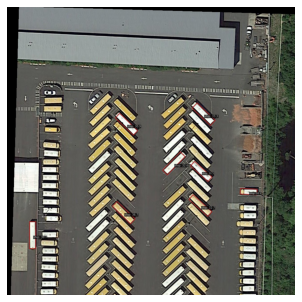

In [15]:
# Use the detector to do inference
img = './demo.jpg'
img = mmcv.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')
result = inference_detector(model, img)
# show the results

visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    show=True,
    wait_time=0,
    pred_score_thr=0.3)
visualizer.show()

### Inference on huge image
Since small image can be successfully detected, what about huge images in remote sensing? We use the high-level API `inference_detector_by_patches` implemented in the MMRotate. This API is created to ease the inference process for huge image. The details of the codes can be found [here](https://github.com/open-mmlab/mmrotate/blob/dev/mmrotate/apis/inference.py).

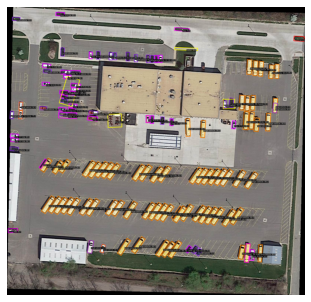

In [38]:
# Use the detector to do inference
from mmrotate.apis import inference_detector_by_patches
img = './dota_demo.jpg'
nms_cfg = dict(type='nms_rotated', iou_threshold=0.1)
result = inference_detector_by_patches(model, img, [512], [500], [0.5,1.0,2.0], nms_cfg)

# show the results
img = mmcv.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    show=True,
    wait_time=0,
    pred_score_thr=0.3)
visualizer.show()

In [25]:
!pip install torchinfo

Looking in indexes: http://mirrors.aliyun.com/pypi/simple


## Use TorchInfo to summary Rotate-RTMDet-l model info
To see the input output shape of each layer in Rotate-RTMDet-l model

In [39]:
from mmrotate.registry import MODELS
from mmrotate.testing import get_detector_cfg
from torchinfo import summary

cfg_file='../configs/rotated_rtmdet/rotated_rtmdet_l-3x-dota.py'
input_size=(1,3,1024,1024)
model=get_detector_cfg(cfg_file)
detector=MODELS.build(model)
summary(detector, input_size)

Layer (type:depth-idx)                                            Output Shape              Param #
RTMDet                                                            [1, 15, 128, 128]         --
├─CSPNeXt: 1-1                                                    [1, 256, 128, 128]        --
│    └─Sequential: 2-1                                            [1, 64, 512, 512]         --
│    │    └─ConvModule: 3-1                                       [1, 32, 512, 512]         928
│    │    └─ConvModule: 3-2                                       [1, 32, 512, 512]         9,280
│    │    └─ConvModule: 3-3                                       [1, 64, 512, 512]         18,560
│    └─Sequential: 2-2                                            [1, 128, 256, 256]        --
│    │    └─ConvModule: 3-4                                       [1, 128, 256, 256]        73,984
│    │    └─CSPLayer: 3-5                                         [1, 128, 256, 256]        178,624
│    └─Sequential: 2-3      

## Train a detector on customized dataset

To train a new detector, there are usually three things to do:
1. Support a new dataset
2. Modify the config
3. Train a new detector



### Support a new dataset

There are three ways to support a new dataset in MMRotate: 
  1. reorganize the dataset into DOTA format.
  2. reorganize the dataset into a middle format.
  3. implement a new dataset.

Usually we recommend to use the first two methods which are usually easier than the third.

In this tutorial, we gives an example that converting the data into the format of existing datasets like DOTA, etc. Other methods and more advanced usages can be found in the [doc](https://mmrotate.readthedocs.io/en/latest/tutorials/customize_dataset.html).

Firstly, let's download a SAR ship dataset obtained from [SSDD](https://github.com/TianwenZhang0825/Official-SSDD). We select the first 193 offshore images and their annotations from the dataset.

In [35]:
# download, decompress the data
!wget https://download.openmmlab.com/mmrotate/data/ssdd_tiny.zip
!unzip ssdd_tiny.zip > /dev/null

--2023-07-06 19:53:01--  https://download.openmmlab.com/mmrotate/data/ssdd_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 106.116.171.240, 182.40.32.240, 106.116.170.239
Connecting to download.openmmlab.com (download.openmmlab.com)|106.116.171.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6741882 (6.4M) [application/zip]
Saving to: ‘ssdd_tiny.zip.1’

ssdd_tiny.zip.1     100%[===================>]   6.43M  11.2MB/s    in 0.6s    

2023-07-06 19:53:02 (11.2 MB/s) - ‘ssdd_tiny.zip.1’ saved [6741882/6741882]

replace ssdd_tiny/images/000001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [27]:
# Check the directory structure of the tiny data
# Install tree first
!apt-get -q install tree
!tree ssdd_tiny

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package tree
/bin/bash: tree: command not found


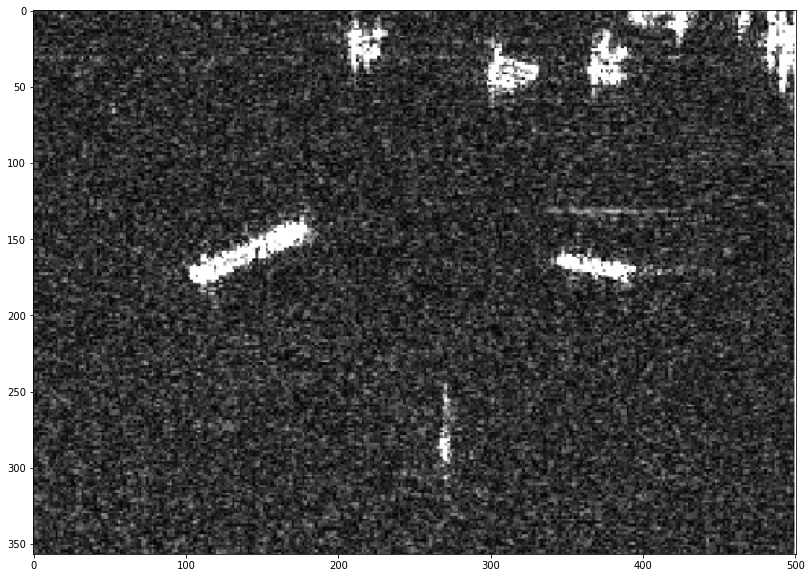

In [41]:
# Let's take a look at the dataset image
import matplotlib.pyplot as plt
img = mmcv.imread('ssdd_tiny/images/000631.png')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

Let's take a look at the annotation txt file.

In [42]:
# Check the label of a single image
!cat ssdd_tiny/train/000631.txt

337 169 395 183 398 162 339 154 ship 0
263 273 261 296 276 297 279 272 ship 0
95 165 173 132 184 156 103 186 ship 0


In [7]:
from mmrotate.registry import DATASETS
from mmrotate.datasets.dota import DOTADataset

@DATASETS.register_module()
class TinyDataset(DOTADataset):
    """SAR ship dataset for detection."""
    
    METAINFO = {
            'classes':('ship',),
                # palette is a list of color tuples, which is used for visualization.
            'palette': [(165, 42, 42),]
        }

### Modify the config

In the next step, we need to modify the config for the training.
To accelerate the process, we finetune a detector using a pre-trained detector.

In [3]:
from mmengine.config import Config
cfg = Config.fromfile('../configs/rotated_rtmdet/rotated_rtmdet_tiny-3x-dota.py')

Given a config that trains a Rotate-RTMDet-tiny on DOTA dataset, we need to modify some values to use it for training Rotate-RTMDet-tiny on SSDD dataset.

In [4]:
import random
import numpy as np
import torch


# Modify dataset type and path
cfg.data_root = 'ssdd_tiny/'
cfg.dataset_type = 'TinyDataset'

# modify num classes of the model in box head
cfg.model.bbox_head.num_classes = 1
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'rotated_rtmdet_tiny-3x-dota-9d821076.pth'

# Set up working dir to save files and logs.
cfg.work_dir = '../tutorial_exps'

cfg.optim_wrapper.optimizer.lr = 0.001

cfg.train_cfg.val_interval = 3
# Change the evaluation metric since we use customized dataset.
cfg.val_evaluator.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.val_evaluator.interval = 3
# We can set the checkpoint saving interval to reduce the storage cost
cfg.default_hooks.checkpoint.interval = 1
# cfg.max_epochs=36
cfg.train_cfg.max_epochs=cfg.max_epochs

# Set seed thus the results are more reproducible
cfg.seed = 0
random.seed(cfg.seed)
np.random.seed(cfg.seed)
torch.cuda.manual_seed(cfg.seed)
torch.cuda.manual_seed_all(cfg.seed)

cfg.gpu_ids = range(1)
cfg.device='cuda'

# Set param_scheduler for train
# cfg.param_scheduler[1]['begin']=cfg.max_epochs//2
# cfg.param_scheduler[1]['end']=cfg.max_epochs
# cfg.param_scheduler[1]['T_max']=cfg.max_epochs//2

# modify pipeline mainly for resize scale (512,512)
cfg.train_pipeline = [
    dict(type='mmdet.LoadImageFromFile', backend_args=None),
    dict(type='mmdet.LoadAnnotations', with_bbox=True, box_type='qbox'),
    dict(type='ConvertBoxType', box_type_mapping=dict(gt_bboxes='rbox')),
    dict(type='mmdet.Resize', scale=(512, 512), keep_ratio=True),
    dict(
        type='mmdet.RandomFlip',
        prob=0.75,
        direction=['horizontal', 'vertical', 'diagonal']),
    dict(
        type='RandomRotate',
        prob=0.5,
        angle_range=180,
        rect_obj_labels=[9, 11]),
    dict(
        type='mmdet.Pad', size=(512, 512),
        pad_val=dict(img=(114, 114, 114))),
    dict(type='mmdet.PackDetInputs')
]
cfg.val_pipeline = [
    dict(type='mmdet.LoadImageFromFile', backend_args=None),
    dict(type='mmdet.Resize', scale=(512, 512), keep_ratio=True),
    dict(type='mmdet.LoadAnnotations', with_bbox=True, box_type='qbox'),
    dict(type='ConvertBoxType', box_type_mapping=dict(gt_bboxes='rbox')),
    dict(
        type='mmdet.Pad', size=(512, 512),
        pad_val=dict(img=(114, 114, 114))),
    dict(
        type='mmdet.PackDetInputs',
        meta_keys=('img_id', 'img_path', 'ori_shape', 'img_shape',
                   'scale_factor'))
]
cfg.test_pipeline = [
    dict(type='mmdet.LoadImageFromFile', backend_args=None),
    dict(type='mmdet.Resize', scale=(512, 512), keep_ratio=True),
    dict(
        type='mmdet.Pad', size=(512, 512),
        pad_val=dict(img=(114, 114, 114))),
    dict(
        type='mmdet.PackDetInputs',
        meta_keys=('img_id', 'img_path', 'ori_shape', 'img_shape',
                   'scale_factor'))
]

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.ann_file = 'val'
cfg.val_dataloader.dataset.data_prefix=dict(img_path='images', img='images')
# cfg.val_dataloader.dataset.img_prefix = 'images'
cfg.val_dataloader.dataset.data_root = 'ssdd_tiny/'

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.ann_file = 'train'
cfg.train_dataloader.dataset.data_prefix=dict(img_path='images', img='images')
# cfg.train_dataloader.dataset.img_prefix = 'images'
cfg.train_dataloader.dataset.data_root = 'ssdd_tiny/'

cfg.test_dataloader.dataset.type = cfg.dataset_type
cfg.test_dataloader.dataset.data_prefix=dict(img_path='images', img='images')
cfg.test_dataloader.dataset.ann_file = 'val'
# cfg.test_dataloader.dataset.img_prefix = 'images'
cfg.test_dataloader.dataset.data_root = 'ssdd_tiny/'

cfg.train_dataloader.dataset.pipeline=cfg.train_pipeline
cfg.val_dataloader.dataset.pipeline=cfg.val_pipeline
cfg.test_dataloader.dataset.pipeline=cfg.test_pipeline

cfg.val_evaluator = dict(type='DOTAMetric', metric='mAP')
cfg.test_evaluator = cfg.val_evaluator
# We can also use tensorboard to log the training process
# cfg.log_config.hooks = [
#     dict(type='TextLoggerHook'),
#     dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
cfg.dump('./tiny_cfg.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
default_scope = 'mmrotate'
default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=50),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(type='CheckpointHook', interval=1, max_keep_ckpts=3),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    visualization=dict(type='mmdet.DetVisualizationHook'))
env_cfg = dict(
    cudnn_benchmark=False,
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0),
    dist_cfg=dict(backend='nccl'))
vis_backends = [dict(type='LocalVisBackend')]
visualizer = dict(
    type='RotLocalVisualizer',
    vis_backends=[dict(type='LocalVisBackend')],
    name='visualizer')
log_processor = dict(type='LogProcessor', window_size=50, by_epoch=True)
log_level = 'INFO'
load_from = 'rotated_rtmdet_tiny-3x-dota-9d821076.pth'
resume = False
custom_hooks = [
    dict(type='mmdet.NumClassCheckHook'),
    dict(
        type='EMAHook',
        ema_type='mmdet.ExpMomentumEMA',
        moment

### Train a new detector

Finally, lets initialize the dataset and detector, then train a new detector!

In [8]:
import mmcv
from mmengine.runner import load_checkpoint
from mmengine.config import Config
from mmengine.runner import Runner

from mmdet.utils import register_all_modules as register_all_modules_mmdet
from mmdet.apis import inference_detector, init_detector

from mmrotate.registry import VISUALIZERS
from mmrotate.utils import register_all_modules

# register all modules in mmdet into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules_mmdet(init_default_scope=False)
register_all_modules(init_default_scope=False)

# register all modules in mmrotate into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(cfg, cfg.checkpoint, palette="ssdd", device=cfg.device)


runner = Runner.from_cfg(cfg)
runner.train()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/cspnext_rsb_pretrain/cspnext-tiny_imagenet_600e.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: head.fc.weight, head.fc.bias

missing keys in source state_dict: neck.reduce_layers.0.conv.weight, neck.reduce_layers.0.bn.weight, neck.reduce_layers.0.bn.bias, neck.reduce_layers.0.bn.running_mean, neck.reduce_layers.0.bn.running_var, neck.reduce_layers.1.conv.weight, neck.reduce_layers.1.bn.weight, neck.reduce_layers.1.bn.bias, neck.reduce_layers.1.bn.running_mean, neck.reduce_layers.1.bn.running_var, neck.top_down_blocks.0.main_conv.conv.weight, neck.top_down_blocks.0.main_conv.bn.weight, neck.top_down_blocks.0.main_conv.bn.bias, neck.top_down_blocks.0.main_conv.bn.running_mean, neck.top_down_blocks.0.main_conv.bn.running_var, neck.top_down_blocks.0.short_conv.conv.weight, neck.top_down_blocks.0.short_conv.bn.weight, neck.top_down_blocks.0.short

/root/miniconda3/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmrotate.visualization.local_visualizer.RotLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


07/06 20:16:19 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
07/06 20:16:19 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
(NORMAL      ) NumClassCheckHook

/root/mmrotate/mmrotate/structures/bbox/rotated_boxes.py:192: UserWarning: The `clip` function does nothing in `RotatedBoxes`.
  warnings.warn('The `clip` function does nothing in `RotatedBoxes`.')
/root/mmrotate/mmrotate/structures/bbox/rotated_boxes.py:192: UserWarning: The `clip` function does nothing in `RotatedBoxes`.
  warnings.warn('The `clip` function does nothing in `RotatedBoxes`.')
/root/mmrotate/mmrotate/structures/bbox/rotated_boxes.py:192: UserWarning: The `clip` function does nothing in `RotatedBoxes`.
  warnings.warn('The `clip` function does nothing in `RotatedBoxes`.')
/root/mmrotate/mmrotate/structures/bbox/rotated_boxes.py:192: UserWarning: The `clip` function does nothing in `RotatedBoxes`.
  warnings.warn('The `clip` function does nothing in `RotatedBoxes`.')
/root/mmrotate/mmrotate/structures/bbox/rotated_boxes.py:192: UserWarning: The `clip` function does nothing in `RotatedBoxes`.
  warnings.warn('The `clip` function does nothing in `RotatedBoxes`.')
/root/mmro

07/06 20:16:24 - mmengine - INFO - Exp name: rotated_rtmdet_tiny-3x-dota_20230706_201618
07/06 20:16:24 - mmengine - INFO - Epoch(train)  [1][14/14]  lr: 1.3023e-05  eta: 0:02:01  time: 0.2484  data_time: 0.0835  memory: 1763  loss: 2.4570  loss_cls: 1.6450  loss_bbox: 0.8119
07/06 20:16:24 - mmengine - INFO - Saving checkpoint at 1 epochs
07/06 20:16:27 - mmengine - INFO - Exp name: rotated_rtmdet_tiny-3x-dota_20230706_201618
07/06 20:16:27 - mmengine - INFO - Epoch(train)  [2][14/14]  lr: 2.7037e-05  eta: 0:01:35  time: 0.2016  data_time: 0.0478  memory: 1763  loss: 2.4805  loss_cls: 1.6852  loss_bbox: 0.7953
07/06 20:16:27 - mmengine - INFO - Saving checkpoint at 2 epochs
07/06 20:16:30 - mmengine - INFO - Exp name: rotated_rtmdet_tiny-3x-dota_20230706_201618
07/06 20:16:30 - mmengine - INFO - Epoch(train)  [3][14/14]  lr: 4.1051e-05  eta: 0:01:26  time: 0.1864  data_time: 0.0360  memory: 1763  loss: 2.5163  loss_cls: 1.7452  loss_bbox: 0.7711
07/06 20:16:30 - mmengine - INFO - Savi

RTMDet(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): CSPNeXt(
    (stem): Sequential(
      (0): ConvModule(
        (conv): Conv2d(3, 12, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (1): ConvModule(
        (conv): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (2): ConvModule(
        (conv): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
    )
    (stage1): Sequential(
      (0): ConvModule(
        (conv): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), pad

### Understand the log
From the log, we can have a basic understanding the training process and know how well the detector is trained.

Firstly, the CSPConvNeXt backbone pre-trained on 600 epochs ImageNet is loaded, this is a common practice since training from scratch is more cost. The log shows that all the weights of the CSPConvNeXt backbone are loaded. Except neck and head params not included...

Second, since the dataset we are using is small, we loaded a RTMDet model and finetune it for detection. 
The original Rotate-RTMDet-tiny is trained on DOTA dataset which contains 15 classes but SSDD dataset only have 1 classes. Therefore, the last FC layer of the pre-trained Rotate-RTMDet-tiny for classification has different weight shape and is not used.

Third, after training, the detector is evaluated by the default evaluation. The results show that the detector achieves over 88.6 mAP on the val dataset,
 not bad!

We can also check the tensorboard to see the curves.

In [9]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir ./tutorial_exps

Loads checkpoint by local backend from path: ./tutorial_exps/epoch_36.pth


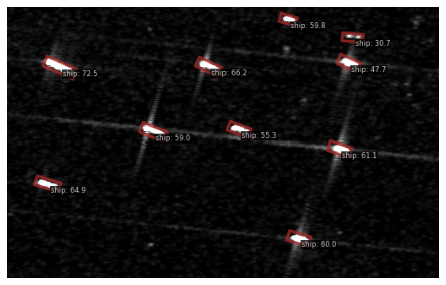

In [16]:
img = mmcv.imread('ssdd_tiny/images/001129.png')
checkpoint="../tutorial_exps/epoch_36.pth"
device='cuda:0'
cfg=Config.fromfile('./tiny_cfg.py')
model = init_detector(cfg, checkpoint, palette="dota", device=device)
result = inference_detector(model, img)
# show the results
img = mmcv.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    show=True,
    wait_time=0,
    pred_score_thr=0.3)
visualizer.show()

## What to Do Next?

So far, we have learnt how to test a one-stage detector using MMRotate. To further explore MMRotate, you could do several other things as shown below:

- Try single-stage detectors, e.g., [Rotated RetinaNet](https://github.com/open-mmlab/mmrotate/tree/dev/configs/rotated_retinanet) and [GWD](https://github.com/open-mmlab/mmrotate/tree/dev/configs/gwd) in [MMRotate model zoo](https://github.com/open-mmlab/mmrotate/blob/dev/docs/en/model_zoo.md). Single-stage detectors are more commonly used than two-stage detectors in industry.
- Try anchor-free detectors, e.g., [Rotated RepPoints](https://github.com/open-mmlab/mmrotate/tree/dev/configs/rotated_reppoints) and [CFA](https://github.com/open-mmlab/mmrotate/tree/dev/configs/cfa) in [MMRotate model zoo](https://github.com/open-mmlab/mmrotate/blob/dev/docs/en/model_zoo.md). Anchor-free detector is a new trend in the object detection community.
